# 1.列を確認する

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/house_price/train/train.csv'
train_df = pd.read_csv(data_path, low_memory=False)

# データの確認
train_df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 基本統計量と欠損値の確認

In [2]:
# 基本統計量の確認
train_df.describe(include='all')


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


特徴量の詳細を確認し、順序を持つカテゴリ変数をマッピングします。

In [3]:
import pandas as pd

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/house_price/train/train.csv'
train_df = pd.read_csv(data_path, low_memory=False)

# マッピングの辞書を定義
lot_shape_mapping = {
    'Reg': 3,
    'IR1': 2,
    'IR2': 1,
    'IR3': 0
}
train_df['LotShape'] = train_df['LotShape'].map(lot_shape_mapping).astype(int)

land_contour_mapping = {
    'Lvl': 3,
    'Bnk': 2,
    'HLS': 1,
    'Low': 0
}
train_df['LandContour'] = train_df['LandContour'].map(land_contour_mapping).astype(int)

utilities_mapping = {
    'AllPub': 3,
    'NoSewr': 2,
    'NoSeWa': 1,
    'ELO': 0
}
train_df['Utilities'] = train_df['Utilities'].map(utilities_mapping).astype(int)

land_slope_mapping = {
    'Gtl': 2,
    'Mod': 1,
    'Sev': 0
}
train_df['LandSlope'] = train_df['LandSlope'].map(land_slope_mapping).astype(int)

bsmt_qual_mapping = {
    'Ex': 5,
    'Gd': 4,
    'TA': 3,
    'Fa': 2,
    'Po': 1,
    'NA': 0
}
train_df['BsmtQual'] = train_df['BsmtQual'].map(bsmt_qual_mapping).fillna(0).astype(int)

bsmt_cond_mapping = {
    'Ex': 5,
    'Gd': 4,
    'TA': 3,
    'Fa': 2,
    'Po': 1,
    'NA': 0
}
train_df['BsmtCond'] = train_df['BsmtCond'].map(bsmt_cond_mapping).fillna(0).astype(int)

bsmt_exposure_mapping = {
    'Gd': 4,
    'Av': 3,
    'Mn': 2,
    'No': 1,
    'NA': 0
}
train_df['BsmtExposure'] = train_df['BsmtExposure'].map(bsmt_exposure_mapping).fillna(0).astype(int)

bsmt_fin_type1_mapping = {
    'GLQ': 6,
    'ALQ': 5,
    'BLQ': 4,
    'Rec': 3,
    'LwQ': 2,
    'Unf': 1,
    'NA': 0
}
train_df['BsmtFinType1'] = train_df['BsmtFinType1'].map(bsmt_fin_type1_mapping).fillna(0).astype(int)

bsmt_fin_type2_mapping = {
    'GLQ': 6,
    'ALQ': 5,
    'BLQ': 4,
    'Rec': 3,
    'LwQ': 2,
    'Unf': 1,
    'NA': 0
}
train_df['BsmtFinType2'] = train_df['BsmtFinType2'].map(bsmt_fin_type2_mapping).fillna(0).astype(int)

heating_qc_mapping = {
    'Ex': 5,
    'Gd': 4,
    'TA': 3,
    'Fa': 2,
    'Po': 1
}
train_df['HeatingQC'] = train_df['HeatingQC'].map(heating_qc_mapping).astype(int)

central_air_mapping = {
    'N': 0,
    'Y': 1
}
train_df['CentralAir'] = train_df['CentralAir'].map(central_air_mapping).astype(int)

functional_mapping = {
    'Typ': 7,
    'Min1': 6,
    'Min2': 5,
    'Mod': 4,
    'Maj1': 3,
    'Maj2': 2,
    'Sev': 1,
    'Sal': 0
}
train_df['Functional'] = train_df['Functional'].map(functional_mapping).astype(int)

fireplace_qu_mapping = {
    'Ex': 5,
    'Gd': 4,
    'TA': 3,
    'Fa': 2,
    'Po': 1,
    'NA': 0
}
train_df['FireplaceQu'] = train_df['FireplaceQu'].map(fireplace_qu_mapping).fillna(0).astype(int)

garage_finish_mapping = {
    'Fin': 3,
    'RFn': 2,
    'Unf': 1,
    'NA': 0
}
train_df['GarageFinish'] = train_df['GarageFinish'].map(garage_finish_mapping).fillna(0).astype(int)

garage_qual_mapping = {
    'Ex': 5,
    'Gd': 4,
    'TA': 3,
    'Fa': 2,
    'Po': 1,
    'NA': 0
}
train_df['GarageQual'] = train_df['GarageQual'].map(garage_qual_mapping).fillna(0).astype(int)

garage_cond_mapping = {
    'Ex': 5,
    'Gd': 4,
    'TA': 3,
    'Fa': 2,
    'Po': 1,
    'NA': 0
}
train_df['GarageCond'] = train_df['GarageCond'].map(garage_cond_mapping).fillna(0).astype(int)

paved_drive_mapping = {
    'Y': 2,
    'P': 1,
    'N': 0
}
train_df['PavedDrive'] = train_df['PavedDrive'].map(paved_drive_mapping).astype(int)

pool_qc_mapping = {
    'Ex': 4,
    'Gd': 3,
    'TA': 2,
    'Fa': 1,
    'NA': 0
}
train_df['PoolQC'] = train_df['PoolQC'].map(pool_qc_mapping)

fence_mapping = {
    'GdPrv': 4,
    'MnPrv': 3,
    'GdWo': 2,
    'MnWw': 1,
    'NA': 0
}
train_df['Fence'] = train_df['Fence'].map(fence_mapping)

misc_feature_mapping = {
    'Elev': 5,
    'Gar2': 4,
    'Othr': 3,
    'Shed': 2,
    'TenC': 1,
    'NA': 0
}
train_df['MiscFeature'] = train_df['MiscFeature'].map(misc_feature_mapping)

# ディレクトリが存在するか確認し、存在しない場合は作成
save_dir = '/Users/hayakawakazue/Downloads/house_price/train'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# 新しい特徴量を作成してデータを保存
train_df_path = os.path.join(save_dir, 'mapping_df.csv')
train_df.to_csv(train_df_path, index=False)

print(f"データ型を変換してデータを保存しました: {train_df_path}")



データ型を変換してデータを保存しました: /Users/hayakawakazue/Downloads/house_price/train/mapping_df.csv


## 新しい特徴量を作成する

In [4]:
import pandas as pd

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/house_price/train/mapping_df.csv'
train_df = pd.read_csv(data_path, low_memory=False)

# ExterQual + ExterCond
train_df['ExterQual_Cond'] = train_df['ExterQual'] + train_df['ExterCond']

# BsmtQual + BsmtCond + BsmtExposure + BsmtFinType1 + BsmtFinType2
train_df['BsmtQual_Cond_Exposure_FinType'] = (
    train_df['BsmtQual'] +
    train_df['BsmtCond'] +
    train_df['BsmtExposure'] +
    train_df['BsmtFinType1'] +
    train_df['BsmtFinType2']
)

# BsmtFullBath + BsmtHalfBath + FullBath + HalfBath
train_df['TotalBath'] = (
    train_df['BsmtFullBath'] +
    train_df['BsmtHalfBath'] +
    train_df['FullBath'] +
    train_df['HalfBath']
)

# GarageArea / GarageCars
train_df['GarageSize'] = train_df['GarageArea'] / train_df['GarageCars']
# GarageCarsが0の場合には、除算を行わないようにします
train_df['GarageSize'] = train_df['GarageSize'].replace([float('inf'), -float('inf')], 0)

# GarageQual + GarageCond
train_df['GarageQual_Cond'] = train_df['GarageQual'] + train_df['GarageCond']

# OpenPorchSF + EnclosedPorch + 3SsnPorch + ScreenPorch
train_df['TotalPorchArea'] = (
    train_df['OpenPorchSF'] +
    train_df['EnclosedPorch'] +
    train_df['3SsnPorch'] +
    train_df['ScreenPorch']
)

# PoolQC + Fence + MiscFeature
train_df['Pool_Fence_Misc'] = (
    train_df['PoolQC'] +
    train_df['Fence'] +
    train_df['MiscFeature']
)

train_df['MoSold_sin'] = np.sin(2 * np.pi * train_df['MoSold'] / 12)
train_df['MoSold_cos'] = np.cos(2 * np.pi * train_df['MoSold'] / 12)

# base_year = train_df['YrSold'].min()  # 最も古い年を基準年として設定
train_df['YearsSinceBuilt'] = train_df['YrSold'] - train_df['YearBuilt']
train_df['YearsSinceRemod'] = train_df['YrSold'] - train_df['YearRemodAdd']

# GarageAreaとGarageCarsの積を新しい特徴量として追加
train_df['GarageInteraction'] = train_df['GarageArea'] * train_df['GarageCars']

# ディレクトリが存在するか確認し、存在しない場合は作成
save_dir = '/Users/hayakawakazue/Downloads/house_price/train'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# 新しい特徴量を作成してデータを保存
train_df_path = os.path.join(save_dir, 'new_features_df.csv')
train_df.to_csv(train_df_path, index=False)

print(f"データ型を変換してデータを保存しました: {train_df_path}")


データ型を変換してデータを保存しました: /Users/hayakawakazue/Downloads/house_price/train/new_features_df.csv


## 欠損値の確認

In [5]:
import pandas as pd

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/house_price/train/new_features_df.csv'
train_df = pd.read_csv(data_path, low_memory=False)

# 欠損値の確認
missing_values = train_df.isnull().sum()
missing_values[missing_values > 0].sort_values(ascending=False)

Pool_Fence_Misc    1459
PoolQC             1453
MiscFeature        1406
Alley              1369
Fence              1179
MasVnrType          872
LotFrontage         259
GarageType           81
GarageSize           81
GarageYrBlt          81
MasVnrArea            8
Electrical            1
dtype: int64

##　欠損値の多い列の削除と補完

In [6]:
import os
import pandas as pd

# Idと欠損値の多い特徴量の削除
train_df = train_df.drop(['Id', 'Pool_Fence_Misc', 'PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1)

# 欠損値の補完
for col in train_df.columns:
    if train_df[col].isnull().sum() > 0:
        if train_df[col].dtype == 'object':
            # カテゴリ変数の場合は最頻値で補完
            train_df[col] = train_df[col].fillna(train_df[col].mode()[0])
        else:
            # 数値変数の場合は中央値で補完
            train_df[col] = train_df[col].fillna(train_df[col].median())

# 全ての行を表示するように設定
pd.set_option('display.max_rows', None)

# 補完後の欠損値確認
print(train_df.isnull().sum().sort_values(ascending=False))

# ディレクトリが存在するか確認し、存在しない場合は作成
save_dir = '/Users/hayakawakazue/Downloads/house_price/train'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# 新しい特徴量を作成してデータを保存
train_df_path = os.path.join(save_dir, 'drop_missing_df.csv')
train_df.to_csv(train_df_path, index=False)

print(f"データ型を変換してデータを保存しました: {train_df_path}")


GarageInteraction                 0
MSSubClass                        0
MSZoning                          0
LotFrontage                       0
LotArea                           0
Street                            0
LotShape                          0
MoSold                            0
YrSold                            0
SaleType                          0
SaleCondition                     0
SalePrice                         0
ExterQual_Cond                    0
BsmtQual_Cond_Exposure_FinType    0
TotalBath                         0
OverallQual                       0
OverallCond                       0
YearBuilt                         0
YearRemodAdd                      0
RoofStyle                         0
RoofMatl                          0
Exterior1st                       0
Exterior2nd                       0
MasVnrType                        0
MasVnrArea                        0
ExterQual                         0
ExterCond                         0
Foundation                  

## SalePriceとの相関関係を確認する

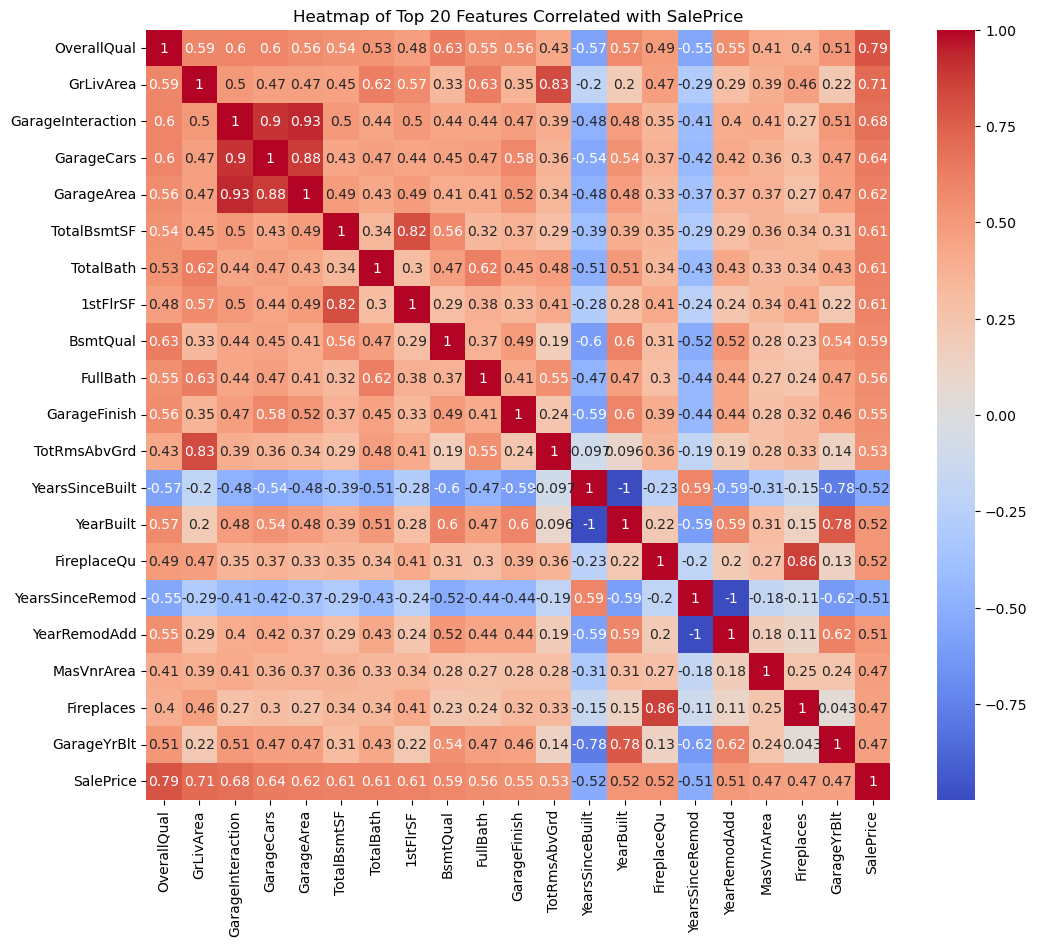

SalePrice                         1.000000
OverallQual                       0.790982
GrLivArea                         0.708624
GarageInteraction                 0.680058
GarageCars                        0.640409
GarageArea                        0.623431
TotalBsmtSF                       0.613581
TotalBath                         0.613005
1stFlrSF                          0.605852
BsmtQual                          0.585207
FullBath                          0.560664
GarageFinish                      0.549247
TotRmsAbvGrd                      0.533723
YearBuilt                         0.522897
FireplaceQu                       0.520438
YearRemodAdd                      0.507101
MasVnrArea                        0.472614
Fireplaces                        0.466929
GarageYrBlt                       0.466754
BsmtQual_Cond_Exposure_FinType    0.449858
HeatingQC                         0.427649
BsmtFinSF1                        0.386420
BsmtExposure                      0.374696
LotFrontage

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# データセットのロード
df = pd.read_csv('/Users/hayakawakazue/Downloads/house_price/train/drop_missing_df.csv')  

numeric_df = df.select_dtypes(include=[ 'int64', 'float64'])

# 相関行列の計算
corr_matrix = numeric_df.corr()

# SalePriceとの相関が高い上位20の特徴量を抽出
top_features = corr_matrix['SalePrice'].abs().sort_values(ascending=False).head(21).index.tolist()
top_features.remove('SalePrice')  # SalePrice自体は除外

# 選択した特徴量のみで再び相関行列を計算
top_corr_matrix = df[top_features + ['SalePrice']].corr()

# ヒートマップの作成
plt.figure(figsize=(12, 10))
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of Top 20 Features Correlated with SalePrice')
plt.show()

corr_with_saleprice = corr_matrix['SalePrice'].sort_values(ascending = False)
print(corr_with_saleprice)

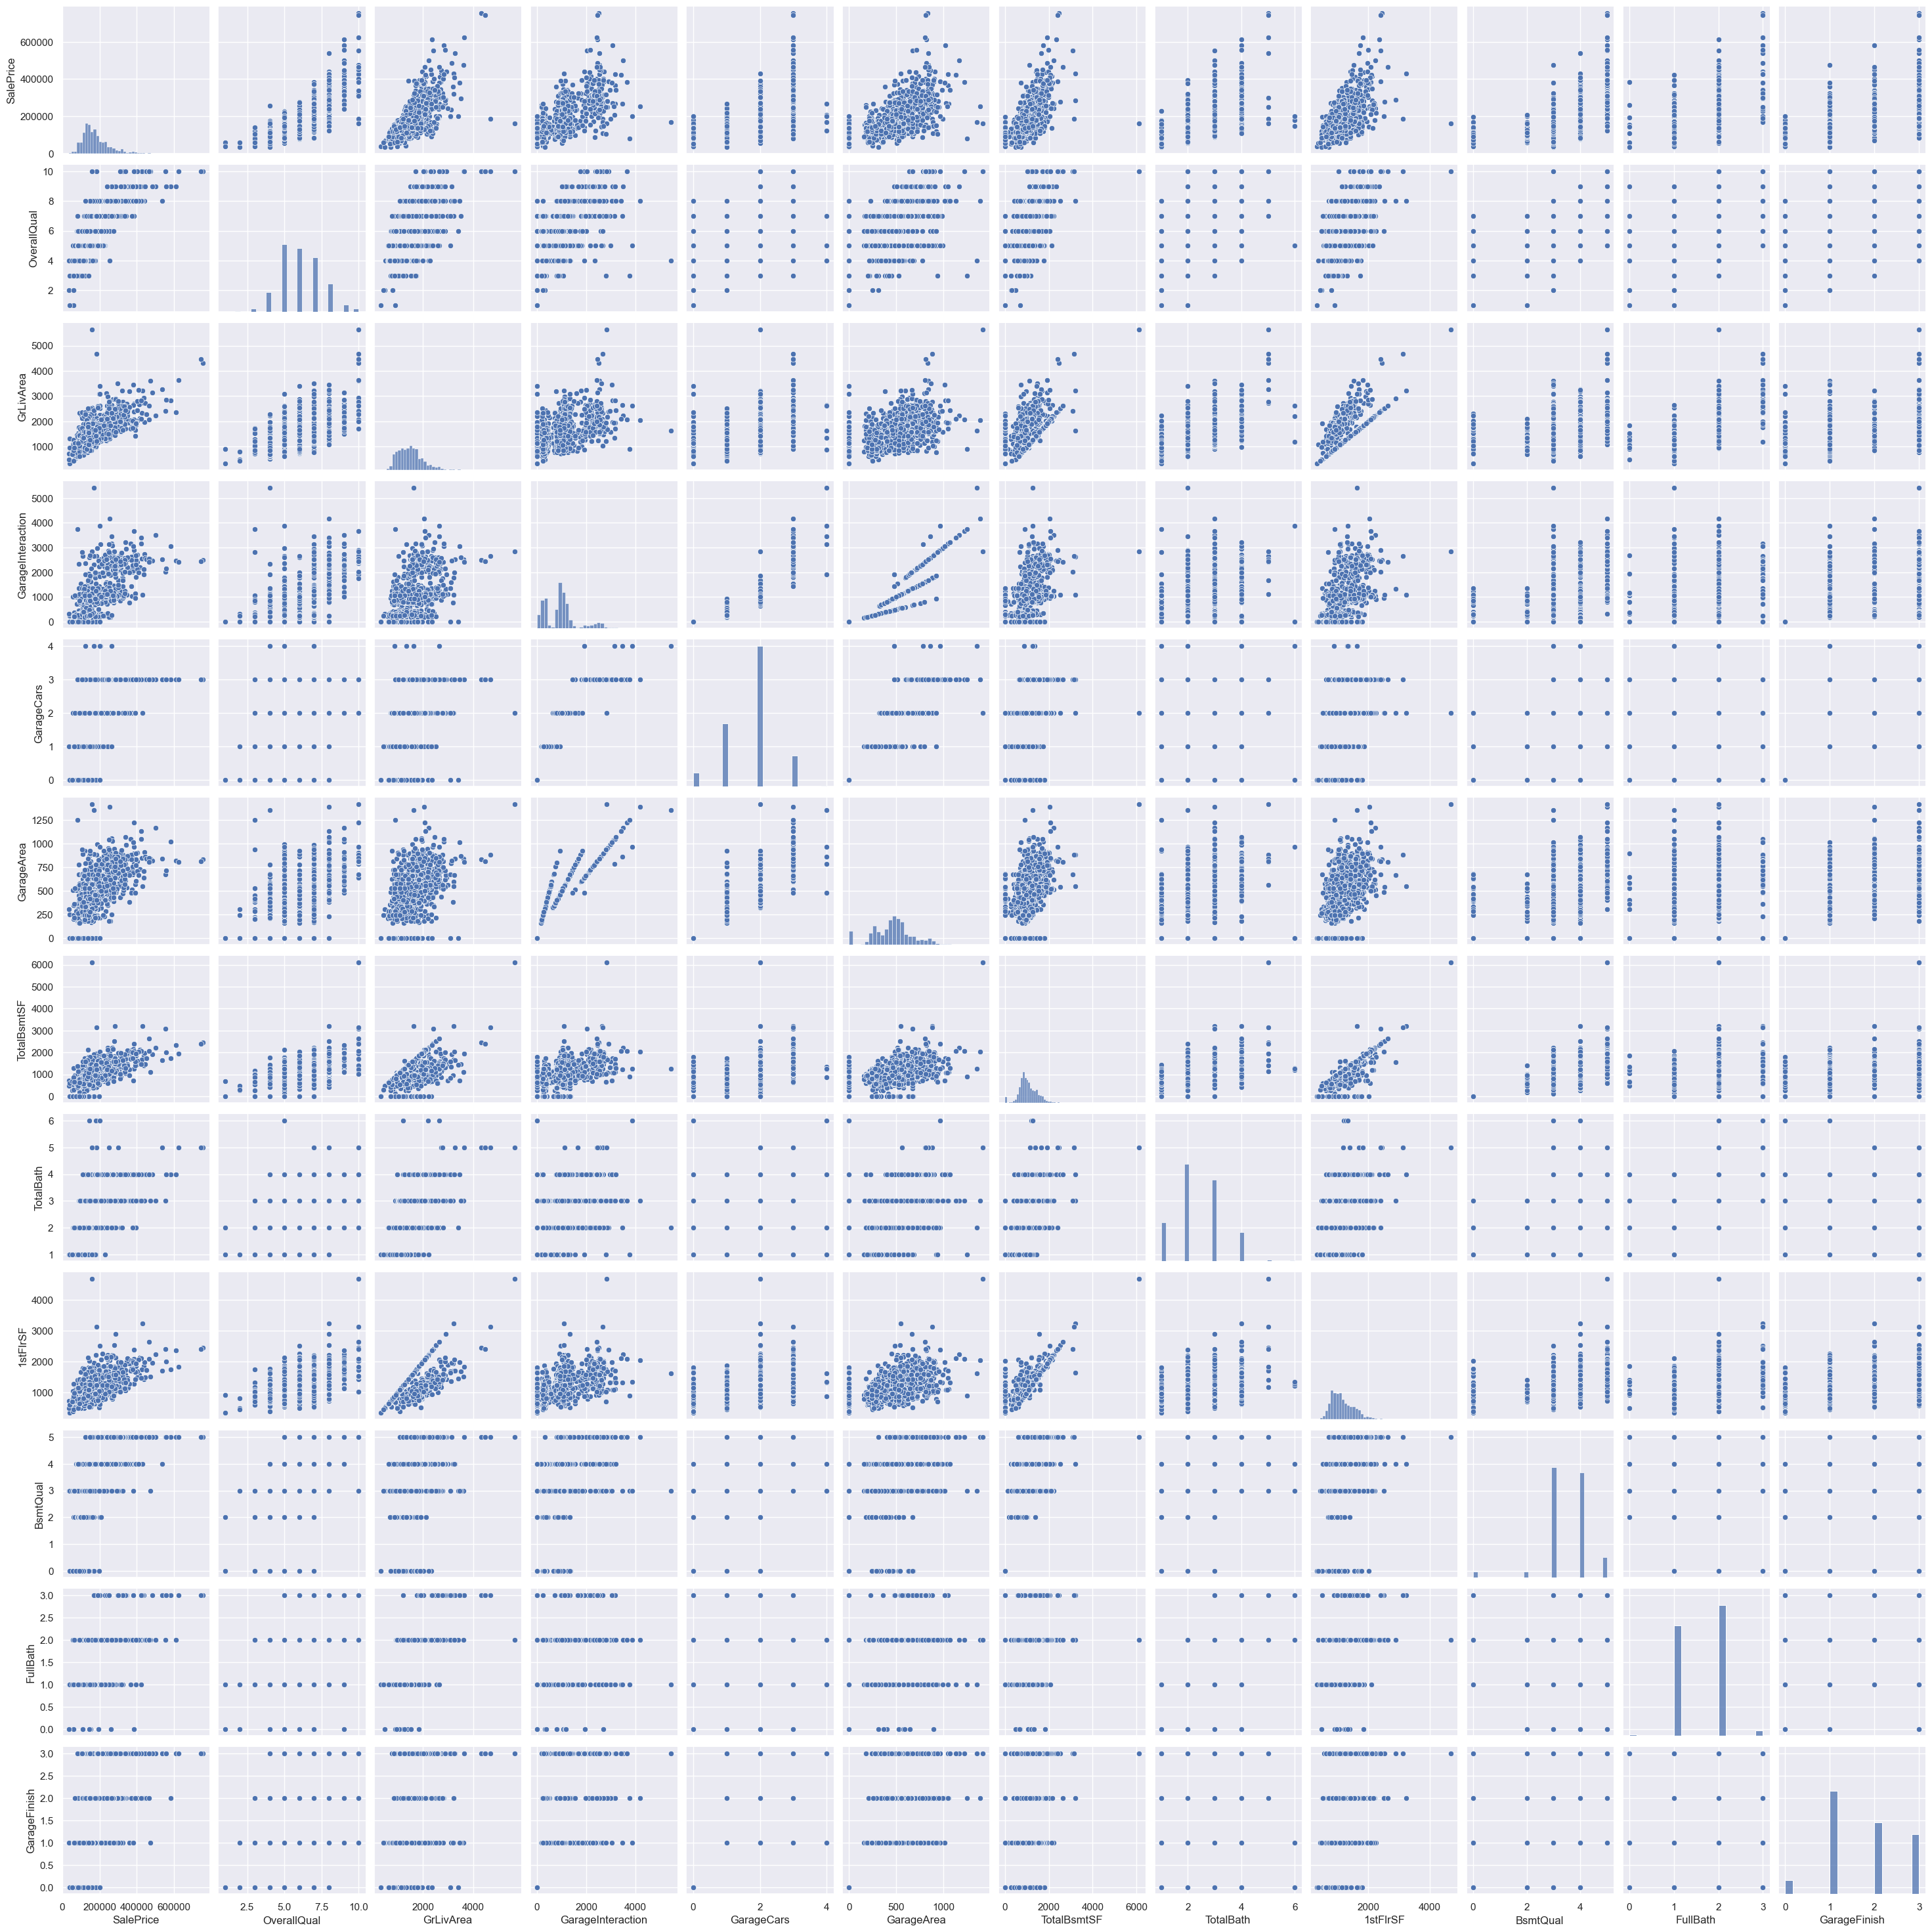

In [10]:
# scatterplot
sns.set()
cols=['SalePrice', 'OverallQual', 'GrLivArea', 'GarageInteraction', 'GarageCars', 'GarageArea',
      'TotalBsmtSF', 'TotalBath', '1stFlrSF', 'BsmtQual', 'FullBath', 'GarageFinish'
]
sns.pairplot(train_df[cols], height=2.5)
plt.show()

# SalePriceとの相関関係を確認する

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
OpenPorchSF     0.315856
LotArea         0.263843
BsmtUnfSF       0.214479
BedroomAbvGr    0.168213
MoSold          0.046432
Id             -0.021917
YrSold         -0.028923
OverallCond    -0.077856
MSSubClass     -0.084284
KitchenAbvGr   -0.135907
Name: SalePrice, dtype: float64


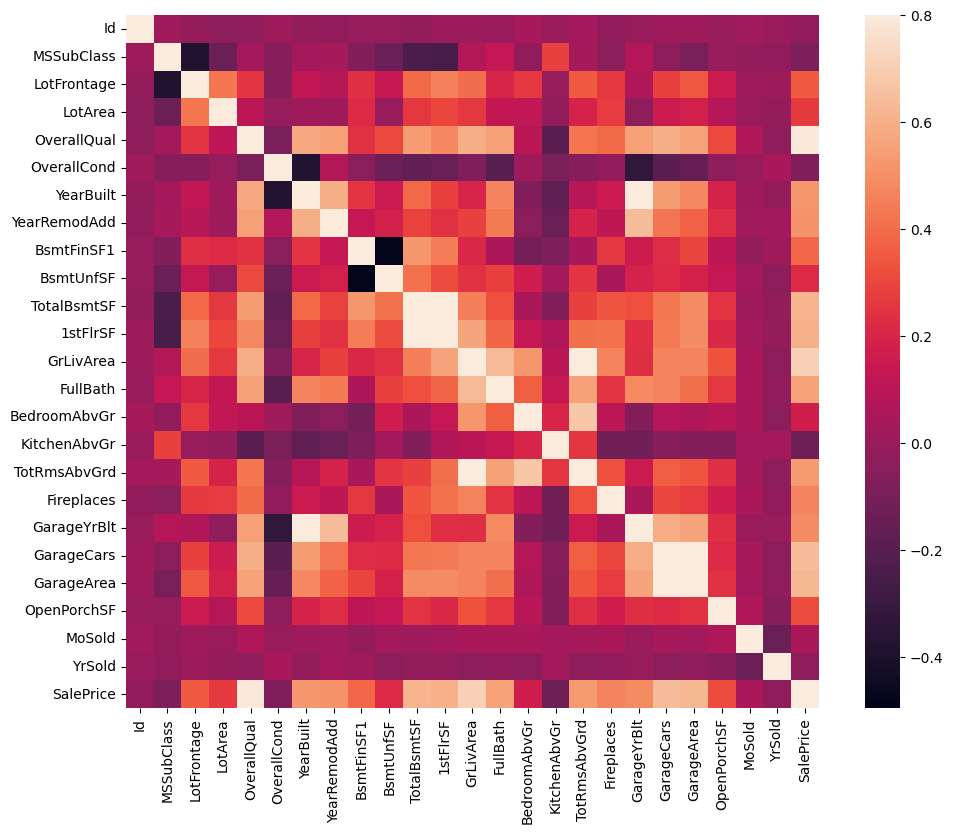

In [10]:
# 数値変数のみを抽出
numeric_df = train_df.select_dtypes(include=[np.number])
corrmat = numeric_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

corr_with_saleprice = corrmat['SalePrice'].sort_values(ascending = False)
print(corr_with_saleprice)

# 相関係数が0.8以上の特徴量のペアをリストアップ

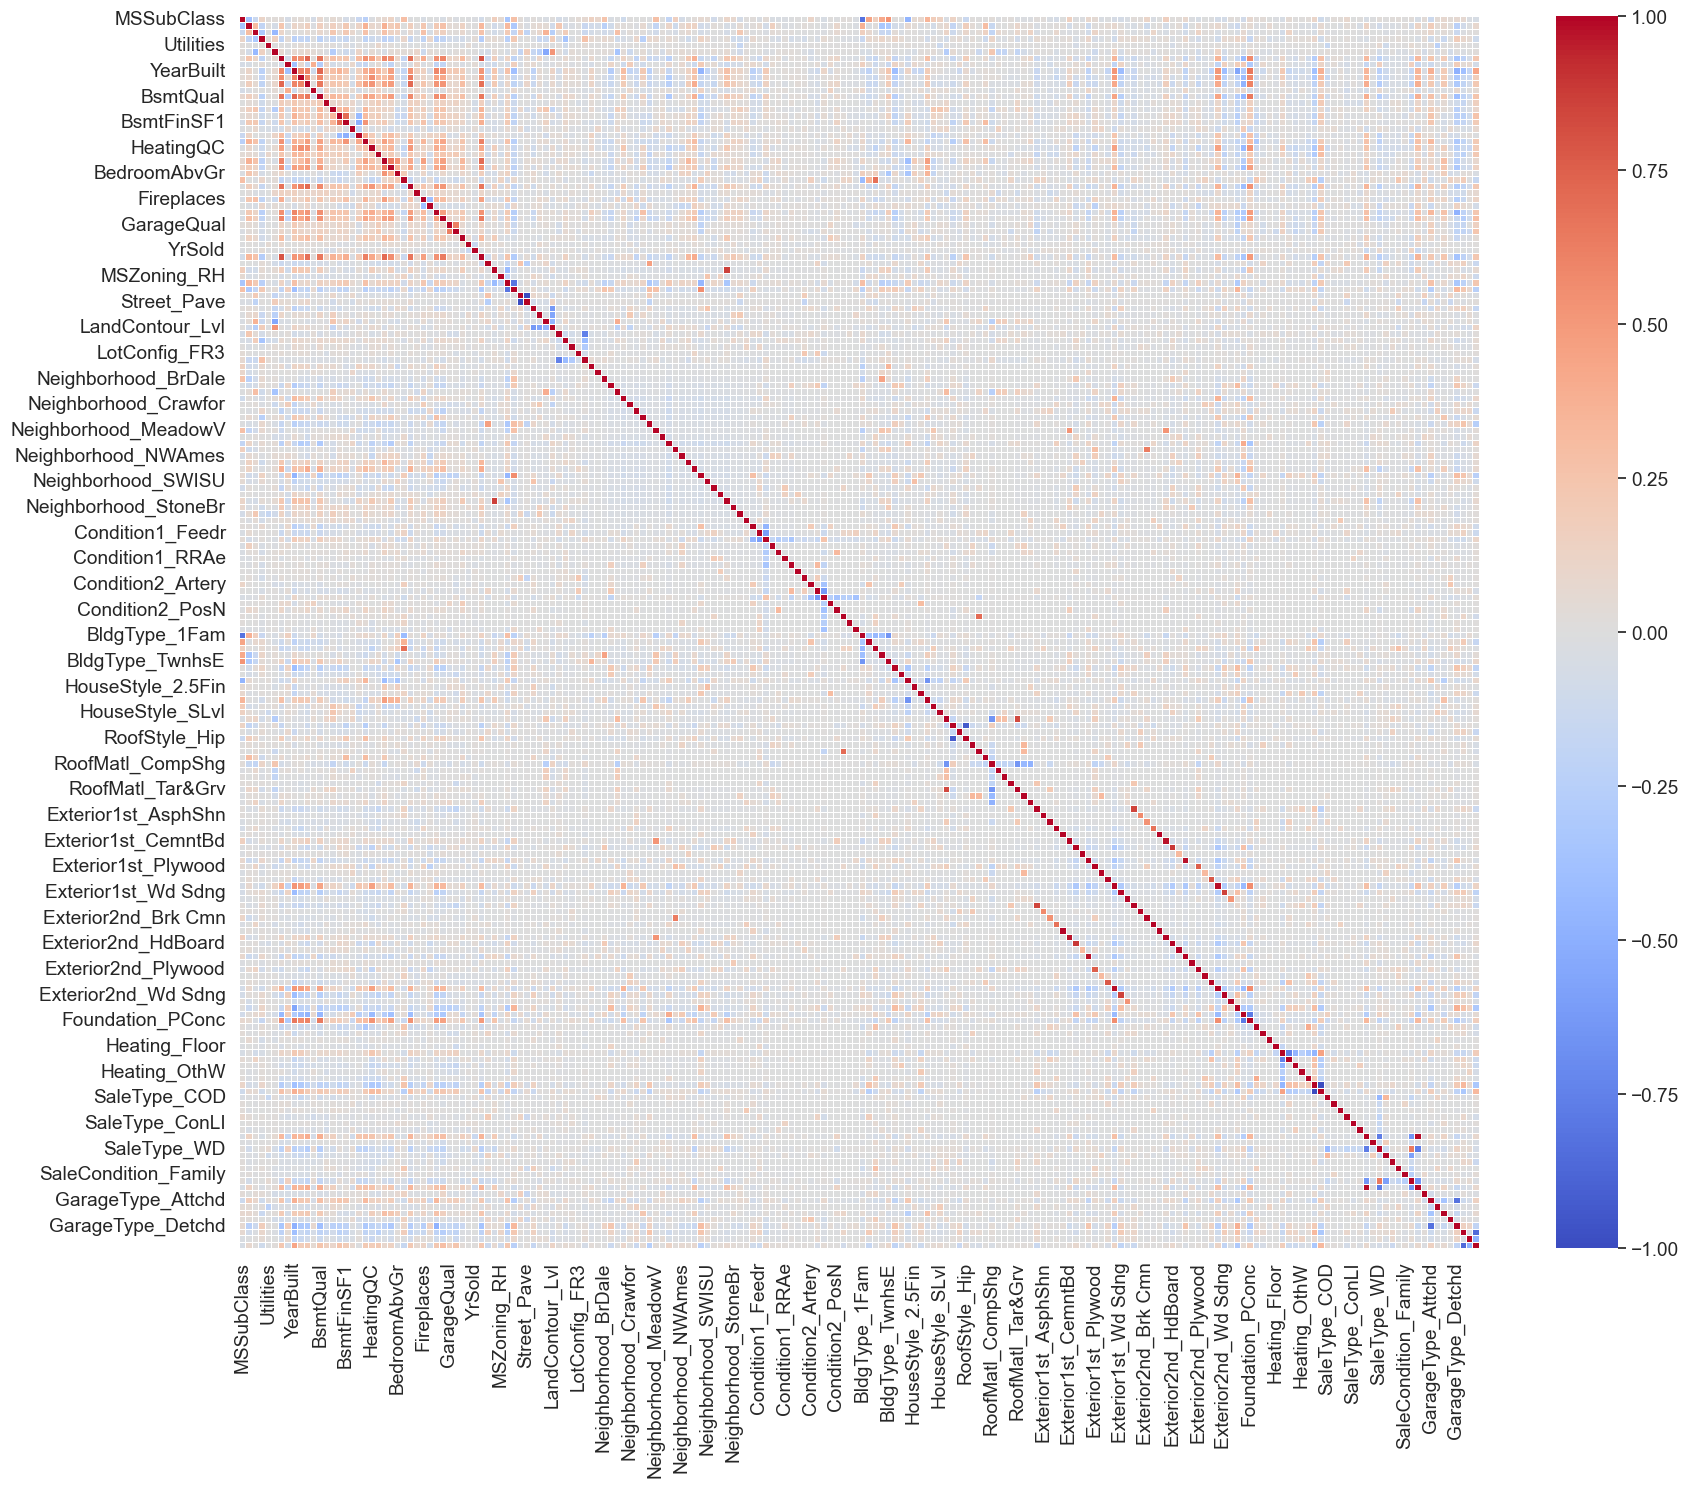

MSZoning_RM and MSZoning_RL: -0.81
Street_Pave and Street_Grvl: -1.00
Neighborhood_Somerst and MSZoning_FV: 0.86
BldgType_1Fam and MSSubClass: -0.82
RoofStyle_Hip and RoofStyle_Gable: -0.93
RoofMatl_Tar&Grv and RoofStyle_Flat: 0.83
Exterior2nd_AsbShng and Exterior1st_AsbShng: 0.85
Exterior2nd_CBlock and Exterior1st_CBlock: 1.00
Exterior2nd_CmentBd and Exterior1st_CemntBd: 0.97
Exterior2nd_HdBoard and Exterior1st_HdBoard: 0.88
Exterior2nd_MetalSd and Exterior1st_MetalSd: 0.97
Exterior2nd_VinylSd and Exterior1st_VinylSd: 0.98
Exterior2nd_Wd Sdng and Exterior1st_Wd Sdng: 0.86
CentralAir_Y and CentralAir_N: -1.00
SaleCondition_Partial and SaleType_New: 0.99
GarageType_Detchd and GarageType_Attchd: -0.82
PavedDrive_Y and PavedDrive_N: -0.86


In [17]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# データの読み込み（ここでは例として再度データを読み込んでいます）
data_path = '/Users/hayakawakazue/Downloads/house_price/train_set/encoding_df.csv'
train_df = pd.read_csv(data_path, low_memory=False)

# 相関行列の計算
numeric_df = train_df.select_dtypes(include=[np.number])
corr_matrix = train_df.corr()

# 相関行列のヒートマップをプロット
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

# 相関係数が0.8以上の特徴量のペアをリストアップ
threshold = 0.8
strong_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) >= threshold:
            colname1 = corr_matrix.columns[i]
            colname2 = corr_matrix.columns[j]
            strong_corr_pairs.append((colname1, colname2, corr_matrix.iloc[i, j]))

# 結果の表示
for pair in strong_corr_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]:.2f}")


# 数値変数の散布図を作成し、線形関係を確認する

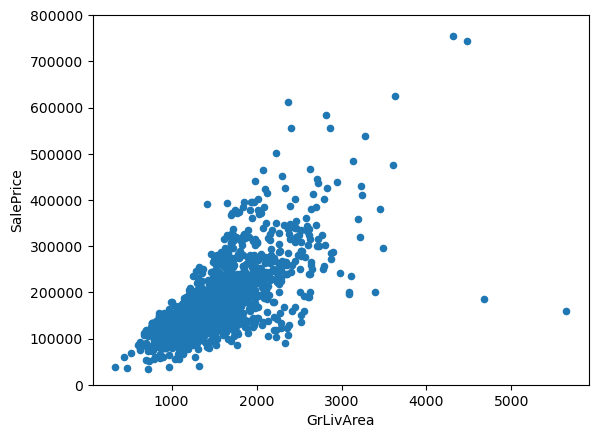

In [9]:
# scatter plot GrLivArea/ SalePrice
var = 'GrLivArea'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis = 1)
data.plot.scatter(x = var, y = 'SalePrice', ylim = (0, 800000));

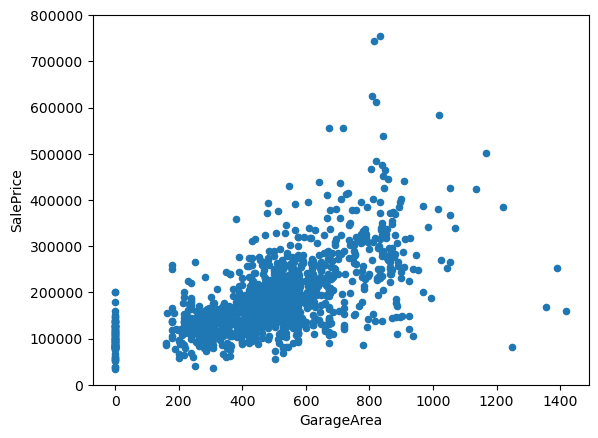

In [10]:
# scatter plot GarageArea/ SalePrice
var = 'GarageArea'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis = 1)
data.plot.scatter(x = var, y = 'SalePrice', ylim = (0, 800000));

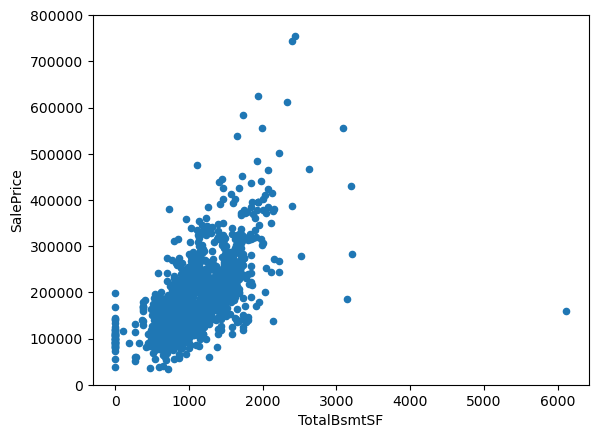

In [12]:
# scatter plot TotalBsmtSF/SalePrice
var = 'TotalBsmtSF'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis = 1)
data.plot.scatter(x = var, y = 'SalePrice', ylim = (0, 800000));

# カテゴリ変数とsalepriceの関係をboxplotで確認する

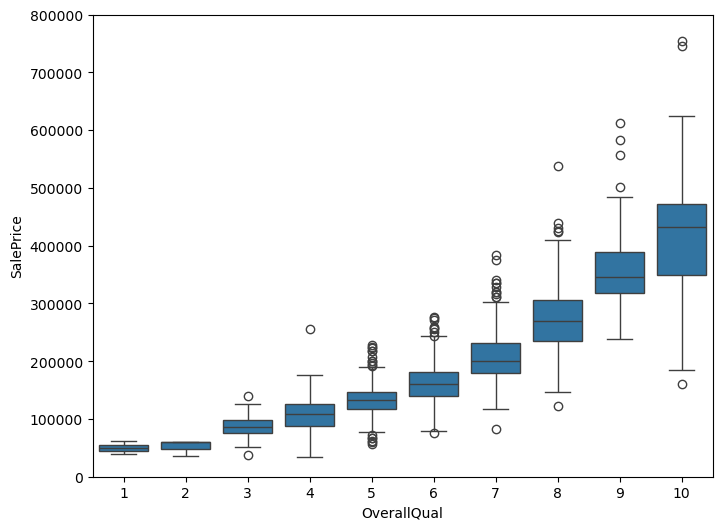

In [15]:
# box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize = (8, 6))
fig = sns.boxplot(x = var, y = 'SalePrice', data=data)
fig.axis(ymin=0, ymax = 800000);

(-0.5, 9.5, 0.0, 800000.0)

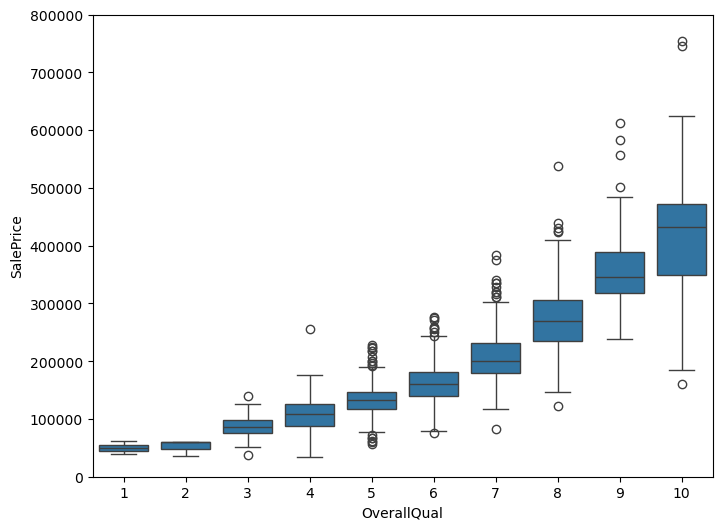

In [17]:
# boxplot kitchenqual/ saleprice
var = 'OverallQual'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot( x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)

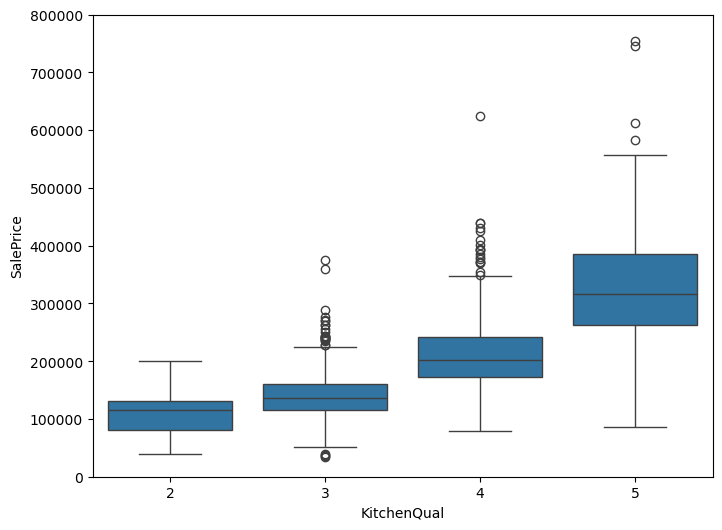

In [3]:
# box plot kitchenQual/SalePrice
var = 'KitchenQual'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000);

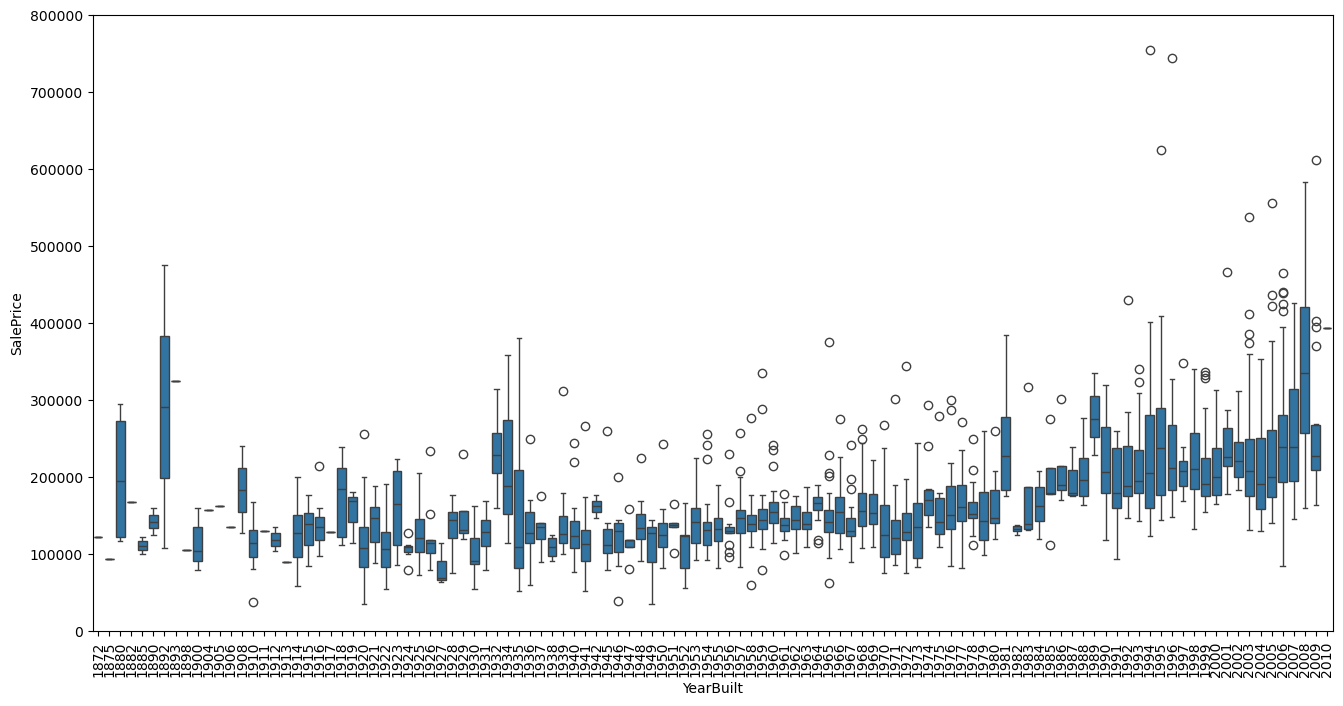

In [19]:
# boxplot YearBuilt/ saleprice
var = 'YearBuilt'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis = 1)
f, ax = plt.subplots(figsize = (16, 8))
fig = sns.boxplot( x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90);

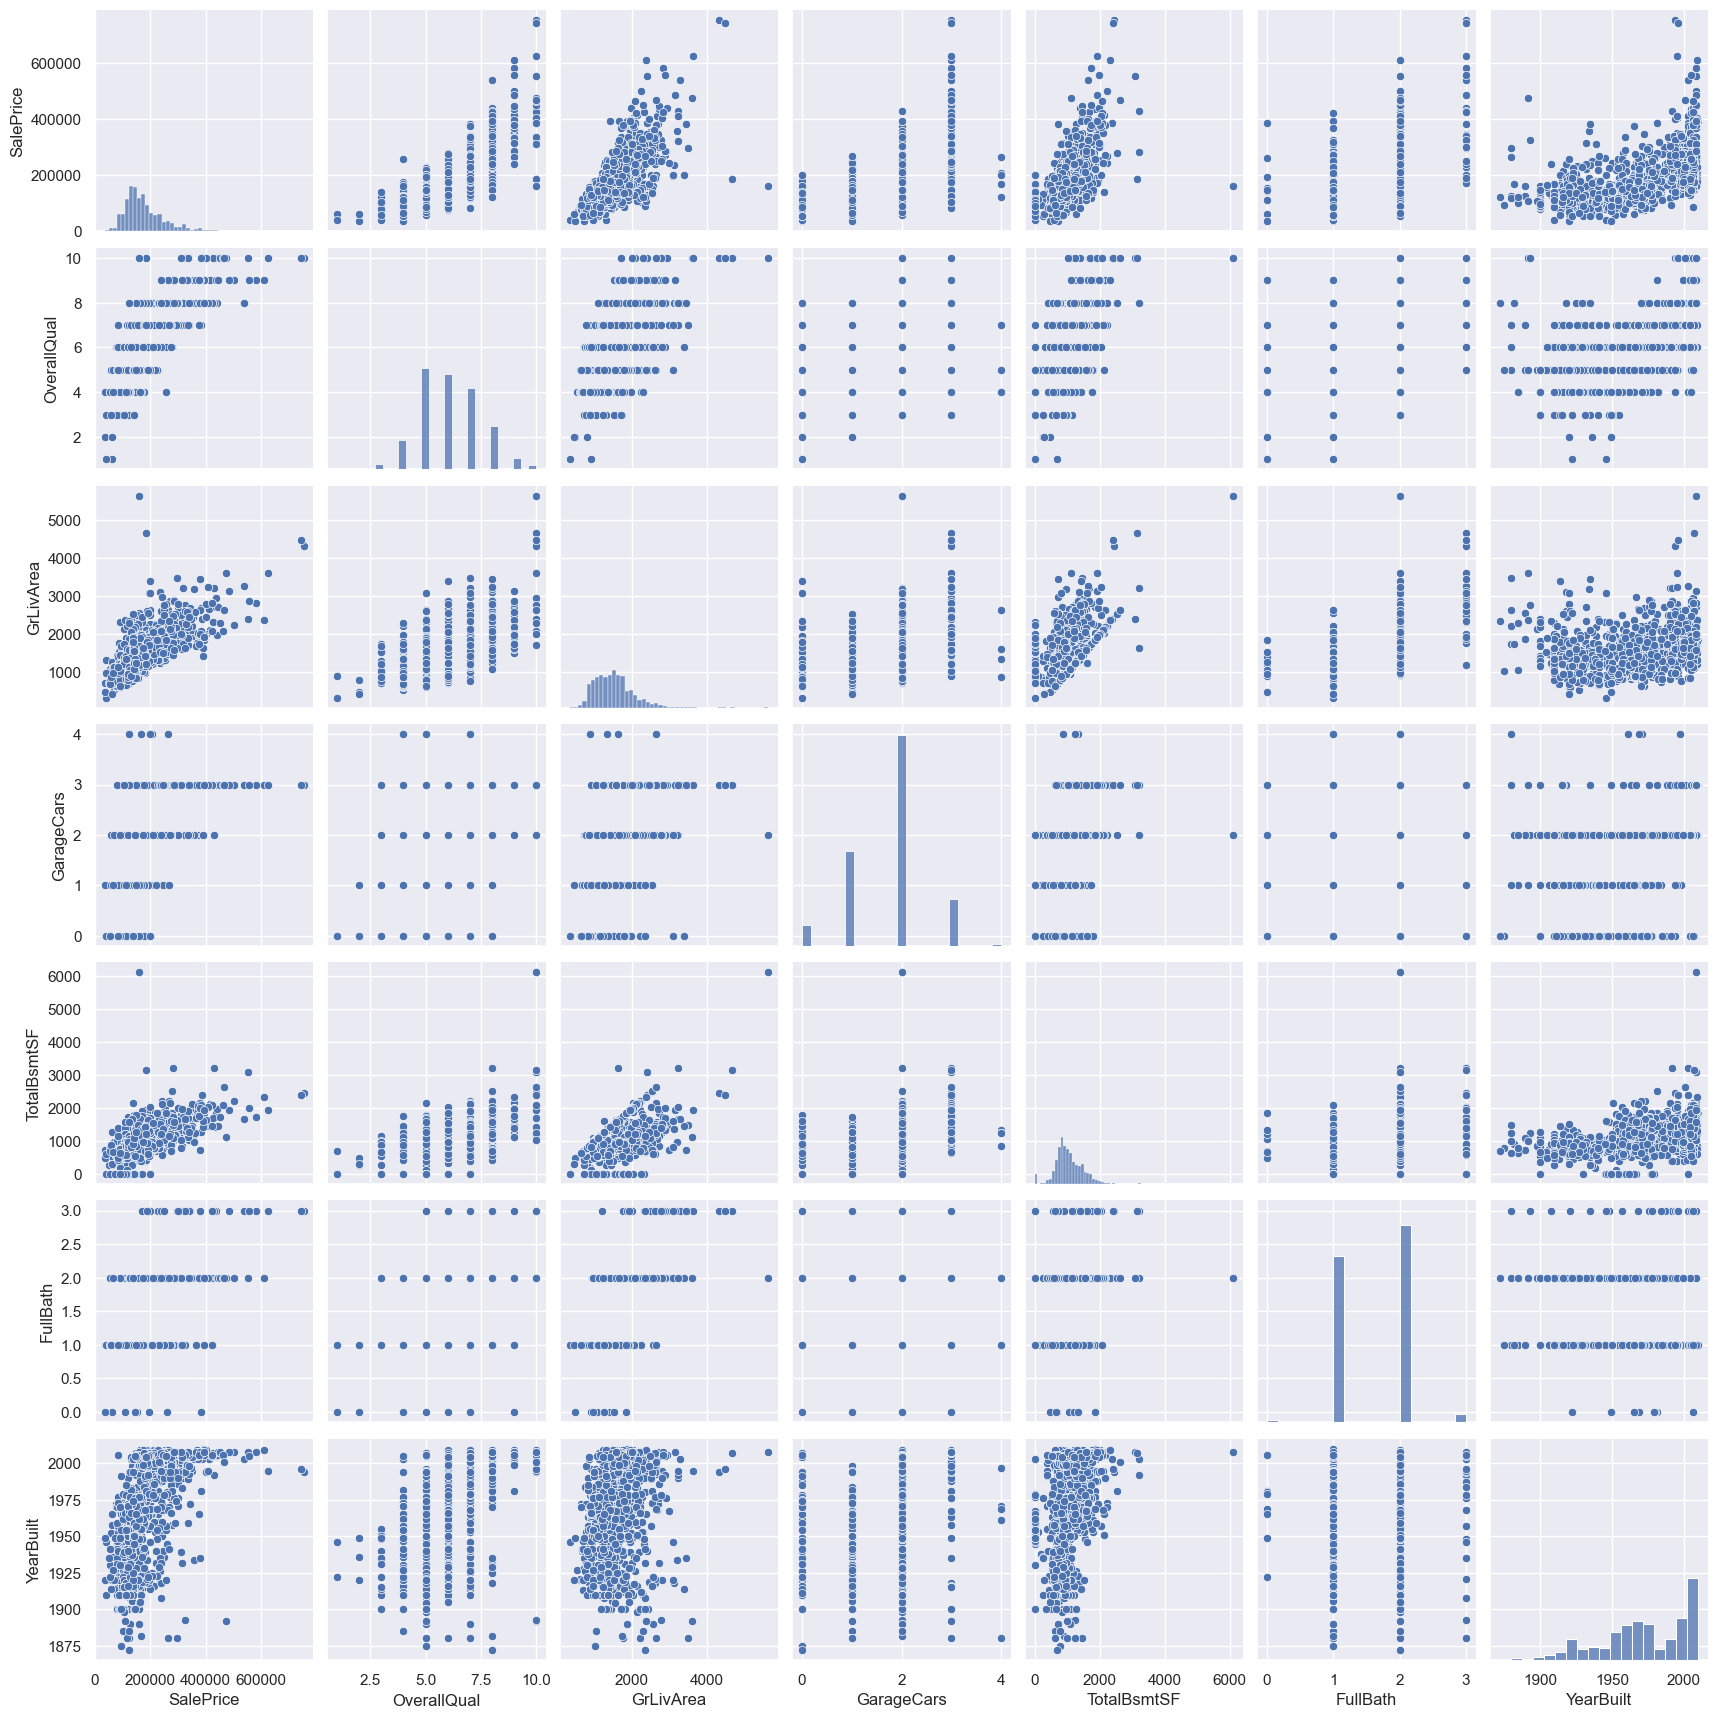

In [16]:
# scatterplot
sns.set()
cols=['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 
      'TotalBsmtSF', 'FullBath', 'YearBuilt'
]
sns.pairplot(train_df[cols], height=2.5)
plt.show()

# 欠損値の数と割合を確認する

In [17]:
# missing data
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
MSSubClass,0,0.0
MSZoning,0,0.0
LotFrontage,0,0.0
LotArea,0,0.0
Street,0,0.0
LotShape,0,0.0
LandContour,0,0.0
Utilities,0,0.0
LotConfig,0,0.0
LandSlope,0,0.0
